# Method Implementation : Support Vector Classifier (SVC)

In machine learning, support vector machines are implemented due to their ability to capture complex models and ability to generalize well to unseen data.

Three datasets are used, 

Dataset 1 : Used for training and testing (training_set)

Dataset 2 : Used for independent testing (testing_set 1)

Dataset 3 : Used for independent testing (testing_set 2)

## Importing the needed libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

## Loading the training CV data

In [29]:
# Loading the processed IMU data 
IMU_data = pd.read_csv('data/training.csv')

# Previewing the IMU data
IMU_data.head()

,motion_state,adt_sum,gdt_sum,axdt_var,aydt_var,azdt_var,gxdt_var,gydt_var,gzdt_var,adt_var,gdt_var,adt_min,gdt_min,adt_max,gdt_max
0,straight,9.498792,0.008515,0.000004,0.000001,0.000006,3.856139e-09,2.467973e-09,1.958251e-09,0.000006,1.076465e-09,0.093785,0.000026,0.101785,0.000171
1,straight,9.799902,0.008413,0.000004,0.000001,0.000007,3.463234e-09,2.769963e-09,1.785013e-09,0.000006,1.299795e-09,0.094010,0.000015,0.101634,0.000167
2,rest,9.792245,0.009893,0.000004,0.000001,0.000007,3.881253e-09,3.281482e-09,3.870479e-09,0.000007,1.794662e-09,0.093513,0.000010,0.101982,0.000219
3,rest,9.796759,0.009319,0.000004,0.000001,0.000008,3.439800e-09,3.309496e-09,2.681825e-09,0.000008,1.547565e-09,0.093461,0.000017,0.102362,0.000206
4,straight,9.806574,0.009778,0.000003,0.000008,0.000006,5.623301e-09,2.478434e-09,2.738851e-09,0.000006,1.621392e-09,0.093818,0.000032,0.102166,0.000213


In [30]:
# Separating and previewing the features
feature_cols = 'axdt_var,aydt_var,gzdt_var'.split(',')
X = IMU_data[feature_cols]
X.head()

,axdt_var,aydt_var,gzdt_var
0,0.000004,0.000001,1.958251e-09
1,0.000004,0.000001,1.785013e-09
2,0.000004,0.000001,3.870479e-09
3,0.000004,0.000001,2.681825e-09
4,0.000003,0.000008,2.738851e-09


In [31]:
# Getting and previewing the target vector
y = IMU_data['motion_state'].copy()
y.head()

0    straight
1    straight
2        rest
3        rest
4    straight
Name: motion_state, dtype: object

In [32]:
# Splitting data into testing and training
# Use of stratification to preserve class imbalance in training, random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## Setting up the Pipeline and Parameter Grid Search

In [33]:
# Setting up pipeline to test different scaling techniques with SVM
pipe = Pipeline([('preprocessor', StandardScaler()),
                 ('classifier', [SVC()])])

In [34]:
# Setting up the parameter grid to tune the hyperparameters and get the best results
param_grid = [{'preprocessor': [StandardScaler(), RobustScaler()],
               'classifier': [SVC()],
               'classifier__C': [0.01, 0.1, 1 ,10,100],
               'classifier__gamma': [0.001, 0.01, 0.1,1],
               'classifier__kernel': ['rbf']
              }]

In [35]:
# Performing a grid search across all the set hyperparameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor', StandardScaler()),
                                       ('classifier', [SVC()])]),
             param_grid=[{'classifier': [SVC()],
                          'classifier__C': [0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1],
                          'classifier__kernel': ['rbf'],
                          'preprocessor': [StandardScaler(), RobustScaler()]}],
             return_train_score=True, scoring='accuracy')

## Grid Search Best Results

In [36]:
# Best parameters
print("Best Parameters:")
grid.best_params_

Best Parameters:


{'classifier': SVC(),
 'classifier__C': 100,
 'classifier__gamma': 0.1,
 'classifier__kernel': 'rbf',
 'preprocessor': RobustScaler()}

In [37]:
# Best cross-validation train score
print("Best CV Train Score:")
grid.cv_results_['mean_train_score'][grid.best_index_]

Best CV Train Score:


0.9005651340996168

## Performance on Testing Data

In [38]:
# Test set accuracy
best_test_model = grid.best_estimator_
print("Test-set score:")
best_test_model.score(X_test, y_test)

Test-set score:


0.8205128205128205

In [39]:
# Testing on completely new dataset
IMU_data2 = pd.read_csv('data/testing.csv')
X2 = IMU_data2[[col for col in IMU_data.columns if col !='motion_state']].copy()
X2 = IMU_data2[feature_cols]
y2 = IMU_data2['motion_state'].copy()
print("Testing 2 set score:")
best_test_model.score(X2, y2)

Testing 2 set score:


0.82

In [40]:
# Testing on completely new dataset
IMU_data3 = pd.read_csv('data/testing2.csv')
X3 = IMU_data3[[col for col in IMU_data.columns if col !='motion_state']].copy()
X3 = IMU_data3[feature_cols]
y3 = IMU_data3['motion_state'].copy()
print("Testing 3 set score:")
best_test_model.score(X3, y3)

Testing 3 set score:


0.8485804416403786

## Visualizing Accuracy

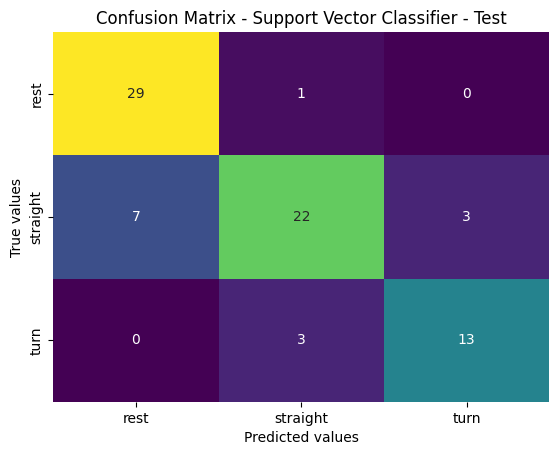


Classification Report for Support Vector Classifier - Test:
              precision    recall  f1-score   support

        rest       0.81      0.97      0.88        30
    straight       0.85      0.69      0.76        32
        turn       0.81      0.81      0.81        16

    accuracy                           0.82        78
   macro avg       0.82      0.82      0.82        78
weighted avg       0.82      0.82      0.82        78


Accuracy Score: 0.8205128205128205
Precision Score: 0.8214031339031339
Recall Score: 0.8222222222222223
F1 Score: 0.816636189481017


In [41]:
# Function for outputting the confusion matrix
def evaluate_classification(true_values, predicted_values, ticklabels, model):
    # Calculate confusion matrix
    confusion_mat = confusion_matrix(true_values, predicted_values)
    
    # Plot heatmap
    sns.heatmap(confusion_mat, xticklabels=ticklabels, yticklabels=ticklabels, annot=True, fmt='d', cbar=False, cmap='viridis')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Confusion Matrix - ' + model)
    plt.show()

    # Calculate scores
    accuracy = accuracy_score(true_values, predicted_values)
    precision = precision_score(true_values, predicted_values, average='macro')
    recall = recall_score(true_values, predicted_values, average='macro')
    f1 = f1_score(true_values, predicted_values, average='macro')

    '''# Calculate additional metrics
    tn, fp, fn, tp = confusion_mat.ravel()

    # Print additional metrics
    print("Metrics for", model)
    print("True Negatives:", tn)
    print("False Positives:", fp)
    print("False Negatives:", fn)
    print("True Positives:", tp)'''

    # Print classification report
    print("\nClassification Report for", model + ":")
    print(classification_report(true_values, predicted_values))

    # Print scores
    print("\nAccuracy Score:", accuracy)
    print("Precision Score:", precision)
    print("Recall Score:", recall)
    print("F1 Score:", f1)
    
pred_val = grid.predict(X_test)
evaluate_classification(y_test, pred_val, ['rest', 'straight', 'turn'], 'Support Vector Classifier - Test')

Lots of straight motion being misclassified as rest, but no turn and rest being misclassified as the other.

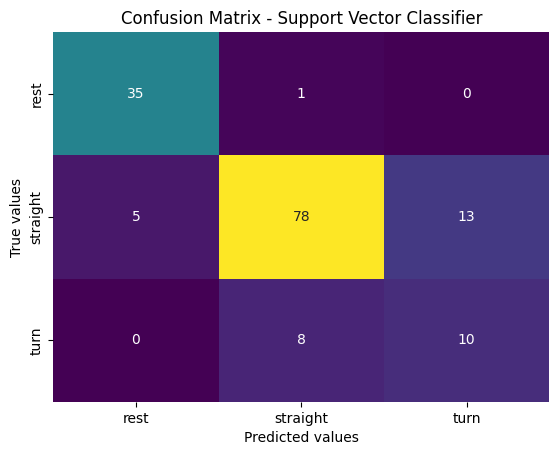


Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

        rest       0.88      0.97      0.92        36
    straight       0.90      0.81      0.85        96
        turn       0.43      0.56      0.49        18

    accuracy                           0.82       150
   macro avg       0.74      0.78      0.75       150
weighted avg       0.84      0.82      0.83       150


Accuracy Score: 0.82
Precision Score: 0.7354447776111944
Recall Score: 0.7800925925925926
F1 Score: 0.7537721753403902


In [42]:
pred_val = grid.predict(X2)
evaluate_classification(y2, pred_val, ['rest', 'straight', 'turn'], 'Support Vector Classifier')

In here, lots of straights are being misclassified as turns.

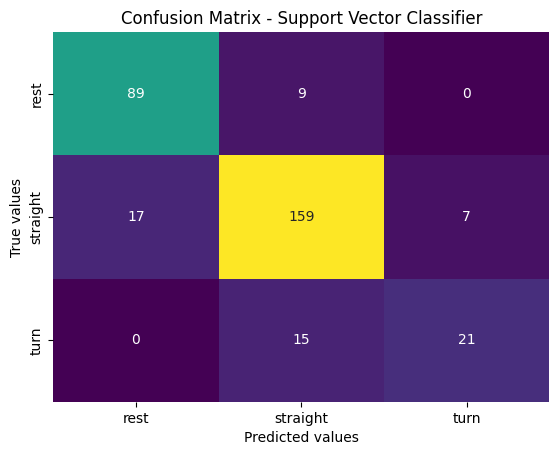


Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

        rest       0.84      0.91      0.87        98
    straight       0.87      0.87      0.87       183
        turn       0.75      0.58      0.66        36

    accuracy                           0.85       317
   macro avg       0.82      0.79      0.80       317
weighted avg       0.85      0.85      0.85       317


Accuracy Score: 0.8485804416403786
Precision Score: 0.8194917001752758
Recall Score: 0.7867830192186164
F1 Score: 0.7992171595414121


In [43]:
pred_val = grid.predict(X3)
evaluate_classification(y3, pred_val, ['rest', 'straight', 'turn'], 'Support Vector Classifier')

In here, lots of misclassification, but still no turn and rest being misclassified as each other.